# Segmentação por Otsu

Segmentação é a tarefa de separar objetos contidos em uma imagem do fundo da imagem. Existem diversas técnicas de segmentação, mas sem dúvida a limiarização é ainda uma das mais utilizadas, por ser simples e rápida. A dificulade em segmentar um objeto por limiarização é encontrar, de forma automática, o valor de limiar adequado.

O método de Otsu é utilizado para ajudar na escolha automática de limiares para segmentação por limiariazação. O algoritmo assume que a imagem contem 2 classes de pixels (pixels do objeto; pixels do fundo). A partir disso, computa um threshold ótimo para separar essas classes de forma que a variância intra-classe seja mínima e a variância inter-classe seja máxima.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

In [45]:
def otsu(f):
     n = np.product(np.shape(f))
     h = 1.*np.bincount(f.ravel()) / n  
     if len(h) == 1: return 1,1
     x = np.arange(np.product(np.shape(h)))
     w0 = np.cumsum(h)
     w1 = 1 - w0
     eps = 1e-10
     m0 = np.cumsum(x * h) / (w0 + eps)
     mt = m0[-1]
     m1 = (mt - m0[0:-1]*w0[0:-1]) / w1[0:-1]
     sB2 = w0[0:-1] * w1[0:-1] * ((m0[0:-1] - m1)**2)
     t = np.argmax(sB2)
     v = sB2[t]
     st2 = sum((x-mt)**2 * h)
     eta = v / st2
     return t, eta

[17658  1757  1322  1216   956  2499  5811 12333 17007  4977]
t= 108


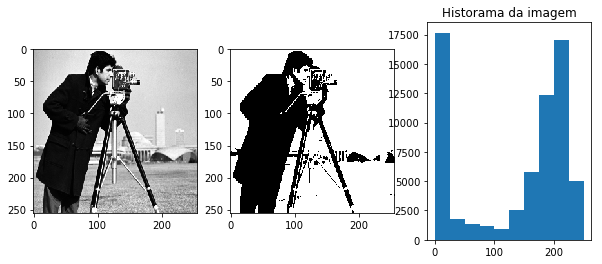

In [46]:
f = mpimg.imread('../data/cameraman.tif')

t,c = otsu(f)
g = f > t

nbins = 10
h, bin_edges = np.histogram(f)
print(h)
w=255./nbins
bin_centers = bin_edges[1:]-(w/2)


#x = np.zeros(h.size)
#x[t] = h.max()

print('t=',t)

plt.figure(1,(10,4))
plt.subplot(1,3,1)
plt.imshow(f,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(g,cmap='gray')
plt.subplot(1,3,3)
plt.bar(bin_centers, h, width=w)
plt.title('Historama da imagem')


### Links interessantes

- [Demo sobre Otsu](../master/otsudemo.ipynb)
- [Otsu na wikipedia](https://en.wikipedia.org/wiki/Otsu's_method)